In [13]:

from numpy.random import randn
import numpy as np
np.random.seed(123)
import os
import matplotlib.pyplot as plt
import pandas as pd
plt.rc("figure", figsize=(10, 6))
np.set_printoptions(precision=4)
pd.options.display.max_columns = 20
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80

In [14]:
path = "datasets/bitly_usagov/example.txt"

In [15]:
import json
with open(path) as f:
    records = [json.loads(line) for line in f]

Thực hiện việc cấu hình môi trường và tải dữ liệu.
Nhập thư viện: Tải các thư viện cần thiết (numpy, pandas, matplotlib, json) và thiết lập seed ngẫu nhiên cho tính tái lập.
Cấu hình hiển thị: Thiết lập các tùy chọn hiển thị cho pandas (số hàng, cột tối đa) và matplotlib (kích thước biểu đồ).
Đọc dữ liệu: Mở tệp example.txt (dữ liệu rút gọn từ bit.ly) và sử dụng json.loads(line) để phân tích cú pháp từng dòng JSON thành một list các dictionary (records).

In [16]:
time_zones = [rec["tz"] for rec in records]

KeyError: 'tz'

In [ ]:
time_zones = [rec["tz"] for rec in records if "tz" in rec]
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

Thực hiện việc trích xuất múi giờ từ dữ liệu.
Lọc dữ liệu: Sử dụng list comprehension để trích xuất giá trị của khóa "tz" (múi giờ) từ mỗi bản ghi (rec) trong list records.
Xử lý thiếu khóa: Dòng code thứ hai (và là dòng hiệu quả hơn) đảm bảo chỉ trích xuất khóa "tz" nếu nó tồn tại trong bản ghi, tránh lỗi khi gặp bản ghi thiếu thông tin múi giờ.
Kiểm tra nhanh: In ra 10 phần tử đầu tiên của list múi giờ.

In [ ]:
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

Định nghĩa một hàm Python truyền thống (get_counts) để đếm tần suất xuất hiện của các phần tử trong một chuỗi (sequence). Nó duyệt qua chuỗi và sử dụng một dictionary để lưu trữ số lần đếm cho mỗi phần tử.

In [ ]:
from collections import defaultdict

def get_counts2(sequence):
    counts = defaultdict(int) # values will initialize to 0
    for x in sequence:
        counts[x] += 1
    return counts

Đoạn này định nghĩa một hàm đếm tần suất khác (get_counts2) sử dụng defaultdict từ thư viện collections. defaultdict(int) tự động khởi tạo giá trị là 0 cho bất kỳ khóa mới nào được truy cập, giúp viết mã gọn hơn so với cách kiểm tra if/else truyền thống.

In [ ]:
counts = get_counts(time_zones)
counts["America/New_York"]
len(time_zones)

3440

Áp dụng hàm đếm vừa định nghĩa cho list múi giờ, sau đó kiểm tra số lần xuất hiện của múi giờ "America/New_York" và tổng số lượng bản ghi có múi giờ.

In [ ]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

Định nghĩa hàm top_counts để tìm ra n phần tử có tần suất cao nhất (top n).
Đảo cặp: Chuyển đổi dictionary đếm thành list các cặp (count, tz).
Sắp xếp: Sắp xếp list này. Vì sắp xếp mặc định dựa trên phần tử đầu tiên (count), nên kết quả sẽ được sắp xếp tăng dần theo số lần đếm.
Trích xuất: Lấy n phần tử cuối cùng ([-n:]), là n phần tử có số đếm cao nhất.

In [ ]:
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [ ]:
from collections import Counter
counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

Đoạn này minh họa cách sử dụng đối tượng Counter từ thư viện collections. Counter là công cụ chuyên dụng và hiệu quả nhất trong Python để đếm tần suất. Phương thức .most_common(10) giúp tìm 10 phần tử có tần suất cao nhất một cách trực tiếp.

In [ ]:
frame = pd.DataFrame(records)

In [ ]:
frame.info()
frame["tz"].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
Name: tz, dtype: object

Truy cập cột "tz" (múi giờ) và sử dụng .head() để in ra 5 giá trị đầu tiên của Series này.

In [ ]:
tz_counts = frame["tz"].value_counts()
tz_counts.head()

tz
America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Name: count, dtype: int64

Sử dụng phương thức .value_counts() của Series để đếm tần suất xuất hiện của các giá trị trong cột "tz" và trả về Series kết quả đã được sắp xếp giảm dần theo số đếm.

In [ ]:
clean_tz = frame["tz"].fillna("Missing")
clean_tz[clean_tz == ""] = "Unknown"
tz_counts = clean_tz.value_counts()
tz_counts.head()

tz
America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Name: count, dtype: int64

Thực hiện việc làm sạch dữ liệu múi giờ:
Điền giá trị thiếu: Phương thức .fillna("Missing") thay thế các giá trị NaN (giá trị thiếu) bằng chuỗi "Missing".
Chuẩn hóa chuỗi rỗng: Gán chuỗi "Unknown" cho các giá trị là chuỗi rỗng ("").
Đếm lại: Thực hiện đếm tần suất lại trên Series đã được làm sạch.



In [ ]:
plt.figure(figsize=(10, 4))

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Axes: ylabel='tz'>

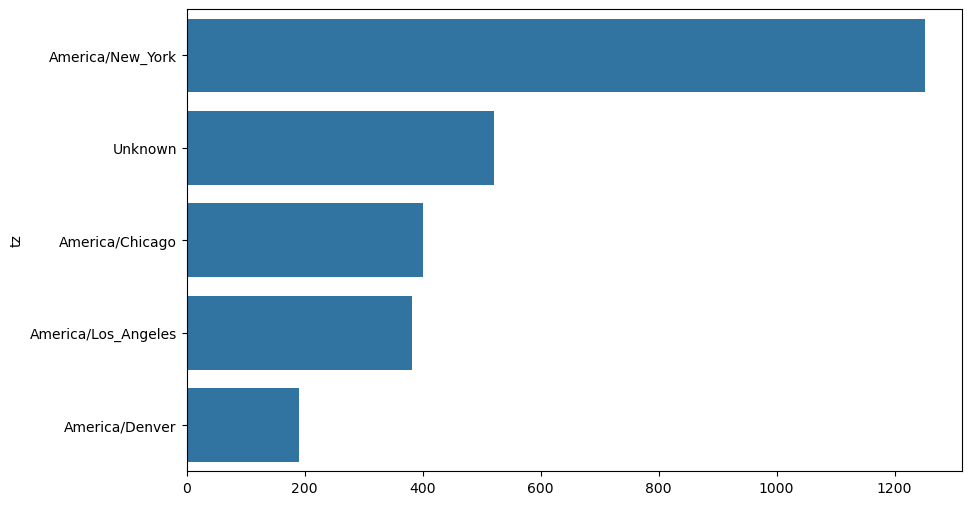

In [ ]:
import seaborn as sns
subset = tz_counts.head()
sns.barplot(y=subset.index, x=subset.to_numpy())

Trực quan hóa 5 múi giờ phổ biến nhất:
Tạo figure: Thiết lập kích thước figure.
Nhập thư viện: Tải thư viện seaborn (sns) để vẽ đồ thị thống kê đẹp hơn.
Lọc dữ liệu: Lấy 5 múi giờ hàng đầu (tz_counts.head()).
Vẽ biểu đồ: Sử dụng sns.barplot để vẽ biểu đồ thanh, với nhãn múi giờ (subset.index) trên trục y và số lượng (subset.to_numpy()) trên trục x.

In [ ]:
frame["a"][1]
frame["a"][50]
frame["a"][51][:50]  # long line

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P9'

Truy cập vào cột "a" (chứa thông tin về tác nhân người dùng - user agent) tại các chỉ mục cụ thể (1, 50, 51) để kiểm tra định dạng dữ liệu. Nó cho thấy các giá trị này thường là chuỗi dài và có thể được cắt ngắn ([:50]) để hiển thị.

In [ ]:
results = pd.Series([x.split()[0] for x in frame["a"].dropna()])
results.head(5)
results.value_counts().head(8)

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
Name: count, dtype: int64

In [ ]:
cframe = frame[frame["a"].notna()].copy()

In [ ]:
cframe["os"] = np.where(cframe["a"].str.contains("Windows"),
                        "Windows", "Not Windows")
cframe["os"].head(5)

0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
Name: os, dtype: object

In [ ]:
by_tz_os = cframe.groupby(["tz", "os"])

In [ ]:
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts.head()

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0


Thực hiện nhóm và tổng hợp dữ liệu theo hai chiều (múi giờ và HĐH):
Nhóm: Sử dụng .groupby(["tz", "os"]) để nhóm dữ liệu theo cặp múi giờ và hệ điều hành.
Đếm và tái cấu trúc: .size() đếm số lượng bản ghi trong mỗi nhóm. .unstack() xoay cột "os" từ chỉ mục hàng thành cột, tạo ra bảng chéo. .fillna(0) thay thế NaN bằng 0.

In [ ]:
indexer = agg_counts.sum("columns").argsort()
indexer.values[:10]

array([ 2,  7,  5,  4, 14, 11,  9,  8, 24, 26])

In [ ]:
count_subset = agg_counts.take(indexer[-10:])
count_subset

In [ ]:
agg_counts.sum(axis="columns").nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

Lấy 10 múi giờ phổ biến nhất dựa trên tổng số nhấp chuột:
Lấy subset: .take(indexer[-10:]) sử dụng các chỉ mục từ indexer[-10:] (là 10 múi giờ có tổng cao nhất) để trích xuất các hàng tương ứng từ agg_counts.
Cách khác: Dòng thứ hai cho thấy cách ngắn hơn để đạt được kết quả tương tự: .sum(axis="columns").nlargest(10) trực tiếp trả về 10 múi giờ hàng đầu (dưới dạng Series).

In [ ]:
plt.figure()

In [ ]:
count_subset = count_subset.stack()
count_subset.name = "total"
count_subset = count_subset.reset_index()
count_subset.head(10)
sns.barplot(x="total", y="tz", hue="os",  data=count_subset)

Vẽ biểu đồ thanh chồng/nhóm để so sánh số lần nhấp chuột theo HĐH cho 10 múi giờ hàng đầu. Tham số hue="os" tạo ra các thanh khác nhau cho "Windows" và "Not Windows" trong mỗi múi giờ.

In [ ]:
def norm_total(group):
    group["normed_total"] = group["total"] / group["total"].sum()
    return group

results = count_subset.groupby("tz").apply(norm_total)

In [ ]:
plt.figure()

In [ ]:
sns.barplot(x="normed_total", y="tz", hue="os",  data=results)

In [ ]:
g = count_subset.groupby("tz")
results2 = count_subset["total"] / g["total"].transform("sum")

Thực hiện việc tính toán tỷ lệ phần trăm tương tự đoạn trước nhưng sử dụng phương thức .transform("sum") hiệu quả hơn. .transform("sum") trả về một Series có cùng độ dài với count_subset["total"], chứa tổng của nhóm tương ứng, cho phép tính tỷ lệ bằng phép chia Series trực tiếp.

In [ ]:
unames = ["user_id", "gender", "age", "occupation", "zip"]
users = pd.read_table("datasets/movielens/users.dat", sep="::",
                      header=None, names=unames, engine="python")

rnames = ["user_id", "movie_id", "rating", "timestamp"]
ratings = pd.read_table("datasets/movielens/ratings.dat", sep="::",
                        header=None, names=rnames, engine="python")

mnames = ["movie_id", "title", "genres"]
movies = pd.read_table("datasets/movielens/movies.dat", sep="::",
                       header=None, names=mnames, engine="python")

Định nghĩa tên cột: Thiết lập tên cột cho mỗi tệp.
Đọc tệp: Sử dụng pd.read_table để đọc ba tệp dữ liệu (users.dat, ratings.dat, movies.dat). Tham số sep="::" chỉ định ký tự phân cách dữ liệu.

In [ ]:
users.head(5)
ratings.head(5)
movies.head(5)
ratings

kiểm tra nhanh 5 hàng đầu tiên của mỗi DataFrame (users, ratings, movies) để xác nhận việc tải dữ liệu và cấu trúc cột là chính xác.

In [ ]:
data = pd.merge(pd.merge(ratings, users), movies)
data
data.iloc[0]

In [ ]:
mean_ratings = data.pivot_table("rating", index="title",
                                columns="gender", aggfunc="mean")
mean_ratings.head(5)

Giá trị: Lấy cột "rating".
Chỉ mục hàng: Lấy cột "title".
Cột: Lấy cột "gender".
Hàm tổng hợp: Tính mean (trung bình).

In [ ]:
ratings_by_title = data.groupby("title").size()
ratings_by_title.head()
active_titles = ratings_by_title.index[ratings_by_title >= 250]
active_titles

Đếm số lượng đánh giá cho mỗi bộ phim bằng cách nhóm theo "title" và sử dụng .size().
lọc ra các phim phổ biến (active_titles) bằng cách chỉ giữ lại tên phim (chỉ mục) có tổng số lượng đánh giá từ 250 trở lên.

In [ ]:
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings

Lọc bảng tổng hợp mean_ratings để chỉ bao gồm các hàng tương ứng với các phim phổ biến (có số lượng đánh giá >= 250) vừa được xác định.

In [ ]:
mean_ratings = mean_ratings.rename(index={"Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)":
                           "Seven Samurai (Shichinin no samurai) (1954)"})

In [ ]:
top_female_ratings = mean_ratings.sort_values("F", ascending=False)
top_female_ratings.head()

Đổi tên: Đổi tên một bộ phim dài bằng .rename(index=...) để làm sạch nhãn.
Sắp xếp: Sắp xếp DataFrame giảm dần theo cột đánh giá của nữ giới ("F") để tìm ra các phim được nữ giới yêu thích nhất.

In [ ]:
mean_ratings["diff"] = mean_ratings["M"] - mean_ratings["F"]

In [ ]:
sorted_by_diff = mean_ratings.sort_values("diff")
sorted_by_diff.head()

Tính chênh lệch: Tạo cột mới "diff" là (Điểm Nam - Điểm Nữ).
Sắp xếp: Sắp xếp theo "diff". sorted_by_diff.head() cho thấy các phim mà nữ giới đánh giá cao hơn nam giới (vì giá trị diff âm lớn nhất).

In [ ]:
sorted_by_diff[::-1].head()

In [ ]:
rating_std_by_title = data.groupby("title")["rating"].std()
rating_std_by_title = rating_std_by_title.loc[active_titles]
rating_std_by_title.head()

Nhóm và tính STD: Nhóm dữ liệu theo "title" và tính .std() (độ lệch chuẩn) của cột "rating".
Lọc: Lọc kết quả để chỉ giữ lại các phim phổ biến (active_titles).

In [ ]:
rating_std_by_title.sort_values(ascending=False)[:10]

Sắp xếp các độ lệch chuẩn giảm dần và in ra 10 phim đứng đầu. Những phim này có sự đồng thuận về đánh giá thấp nhất (tức là nam và nữ hoặc các nhóm người dùng khác nhau có ý kiến rất khác nhau về chúng).



In [ ]:
movies["genres"].head()
movies["genres"].head().str.split("|")
movies["genre"] = movies.pop("genres").str.split("|")
movies.head()

Tách và pop: .pop("genres") trích xuất và xóa cột "genres" khỏi DataFrame, sau đó tách chuỗi thể loại.
Gán: Gán Series list kết quả vào cột "genre".

In [ ]:
movies_exploded = movies.explode("genre")
movies_exploded[:10]

Sử dụng phương thức .explode("genre") để chuyển đổi dữ liệu từ dạng list sang dạng dài: mỗi phần tử trong list "genre" (tức là mỗi thể loại phim) trở thành một hàng riêng biệt, nhân bản các cột thông tin phim khác.

In [ ]:
ratings_with_genre = pd.merge(pd.merge(movies_exploded, ratings), users)
ratings_with_genre.iloc[0]
genre_ratings = (ratings_with_genre.groupby(["genre", "age"])
                 ["rating"].mean()
                 .unstack("age"))
genre_ratings[:10]

Đoạn này phân tích điểm đánh giá trung bình theo thể loại và nhóm tuổi:
Nhóm: Nhóm dữ liệu theo cặp thể loại và tuổi.
Tính trung bình: Tính mean() của "rating".
Tái cấu trúc: .unstack("age") xoay cột tuổi thành các cột, tạo ra bảng chéo thể loại so với tuổi.

In [ ]:
!head -n 10 datasets/babynames/yob1880.txt

In [ ]:
names1880 = pd.read_csv("datasets/babynames/yob1880.txt",
                        names=["name", "sex", "births"])
names1880

In [ ]:
names1880.groupby("sex")["births"].sum()

Tính tổng số lượng sinh theo giới tính trong năm 1880 bằng cách nhóm theo "sex" và tính sum() của cột "births".    

In [ ]:
pieces = []
for year in range(1880, 2011):
    path = f"datasets/babynames/yob{year}.txt"
    frame = pd.read_csv(path, names=["name", "sex", "births"])

    # Add a column for the year
    frame["year"] = year
    pieces.append(frame)

# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)

Đoạn này gộp toàn bộ dữ liệu tên trẻ em từ năm 1880 đến 2010:
Vòng lặp: Duyệt qua các năm, đọc từng tệp.
Thêm cột năm: Thêm cột "year" vào mỗi DataFrame con.
Gộp: Sử dụng pd.concat() để nối tất cả các DataFrame con (pieces) thành một DataFrame lớn duy nhất (names).

In [ ]:
names

In [ ]:
total_births = names.pivot_table("births", index="year",
                                 columns="sex", aggfunc=sum)
total_births.tail()
total_births.plot(title="Total births by sex and year")

In [ ]:
def add_prop(group):
    group["prop"] = group["births"] / group["births"].sum()
    return group
names = names.groupby(["year", "sex"], group_keys=False).apply(add_prop)

Tính toán tỷ lệ phần trăm (prop) của mỗi tên so với tổng số sinh trong năm và giới tính đó:
Hàm add_prop: Tính tỷ lệ bằng cách chia số lượng sinh của tên cho tổng số sinh của nhóm.
Áp dụng hàm: .groupby(["year", "sex"]).apply(add_prop) áp dụng hàm này cho từng nhóm (năm, giới tính). group_keys=False ngăn chặn việc tạo ra chỉ mục đa cấp không cần thiết.

In [ ]:
names

In [ ]:
names.groupby(["year", "sex"])["prop"].sum()

In [ ]:
def get_top1000(group):
    return group.sort_values("births", ascending=False)[:1000]
grouped = names.groupby(["year", "sex"])
top1000 = grouped.apply(get_top1000)
top1000.head()

Lấy 1000 tên phổ biến nhất cho mỗi năm và giới tính:
Hàm get_top1000: Sắp xếp nhóm theo "births" giảm dần và trả về 1000 hàng đầu.
Áp dụng: Áp dụng hàm này cho từng nhóm (năm, giới tính) của DataFrame names.

In [ ]:
top1000 = top1000.reset_index(drop=True)

In [ ]:
top1000.head()

Sử dụng .reset_index(drop=True) để loại bỏ các chỉ mục cấp cao được tạo ra bởi .apply() 
và chuyển DataFrame top1000 trở lại chỉ mục số đơn giản.



In [ ]:
boys = top1000[top1000["sex"] == "M"]
girls = top1000[top1000["sex"] == "F"]

In [ ]:
total_births = top1000.pivot_table("births", index="year",
                                   columns="name",
                                   aggfunc=sum)

In [ ]:
total_births.info()
subset = total_births[["John", "Harry", "Mary", "Marilyn"]]
subset.plot(subplots=True, figsize=(12, 10),
            title="Number of births per year")

Vẽ biểu đồ xu hướng cho một tập hợp các tên đã chọn. subplots=True tạo ra các biểu đồ riêng biệt cho mỗi tên, giúp dễ dàng theo dõi sự thay đổi về số lượng sinh qua các năm.

In [ ]:
plt.figure()

In [ ]:
table = top1000.pivot_table("prop", index="year",
                            columns="sex", aggfunc=sum)
table.plot(title="Sum of table1000.prop by year and sex",
           yticks=np.linspace(0, 1.2, 13))

Tính tổng tỷ lệ "prop" của top 1000 tên cho mỗi năm và giới tính, sau đó vẽ biểu đồ. Tổng này cho thấy mức độ tập trung của việc đặt tên (bao nhiêu phần trăm của tổng số sinh được bao phủ bởi 1000 tên hàng đầu).

In [ ]:
df = boys[boys["year"] == 2010]
df

In [ ]:
prop_cumsum = df["prop"].sort_values(ascending=False).cumsum()
prop_cumsum[:10]
prop_cumsum.searchsorted(0.5)

Sử dụng phương thức .searchsorted(0.5) trên tổng tích lũy để tìm chỉ mục đầu tiên mà tổng tích lũy vượt quá 0.5 (50%). Kết quả cho biết số lượng tên cần thiết để đạt 50% tổng số sinh của năm 2010.

In [ ]:
df = boys[boys.year == 1900]
in1900 = df.sort_values("prop", ascending=False).prop.cumsum()
in1900.searchsorted(0.5) + 1

Đoạn này lặp lại phân tích trên cho năm 1900. Kết quả cho thấy số lượng tên cần thiết để đạt 50% tổng số sinh là nhỏ hơn nhiều so với năm 2010, chứng tỏ sự đa dạng hóa trong việc đặt tên đã tăng lên theo thời gian.

In [ ]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values("prop", ascending=False)
    return group.prop.cumsum().searchsorted(q) + 1

diversity = top1000.groupby(["year", "sex"]).apply(get_quantile_count)
diversity = diversity.unstack()

NameError: name 'top1000' is not defined

In [17]:
fig = plt.figure()

<Figure size 1000x600 with 0 Axes>

In [18]:
diversity.head()
diversity.plot(title="Number of popular names in top 50%")

NameError: name 'diversity' is not defined

Tổng quát hóa việc tìm số lượng tên cần thiết để đạt 50% tổng số sinh (tham số q) cho tất cả các năm và giới tính:
Hàm tổng quát: Hàm get_quantile_count tính số lượng tên cần thiết.
Áp dụng: Áp dụng hàm này cho DataFrame top1000, tạo ra Series đa cấp diversity.
Tái cấu trúc: .unstack() xoay cột giới tính thành cột để dễ dàng so sánh.

In [ ]:
def get_last_letter(x):
    return x[-1]

last_letters = names["name"].map(get_last_letter)
last_letters.name = "last_letter"

table = names.pivot_table("births", index=last_letters,
                          columns=["sex", "year"], aggfunc=sum)

Phân tích xu hướng ký tự cuối cùng của tên:
Hàm get_last_letter: Trích xuất ký tự cuối cùng của tên.
Áp dụng: .map() áp dụng hàm này cho cột "name".
Pivot: Tạo bảng tổng hợp với ký tự cuối cùng làm chỉ mục hàng và cặp (giới tính, năm) làm cột, với giá trị là tổng số sinh.

In [ ]:
subtable = table.reindex(columns=[1910, 1960, 2010], level="year")
subtable.head()

Chọn một tập hợp các cột từ bảng table đa cấp, cụ thể là các năm 1910, 1960, 2010, sử dụng tham số level="year".

In [ ]:
subtable.sum()
letter_prop = subtable / subtable.sum()
letter_prop

Tính tỷ lệ phần trăm của mỗi ký tự cuối cùng so với tổng số sinh trong cột đó. Phép chia Series với DataFrame được thực hiện theo quy tắc phát sóng (broadcasting).

NameError: name 'letter_prop' is not defined

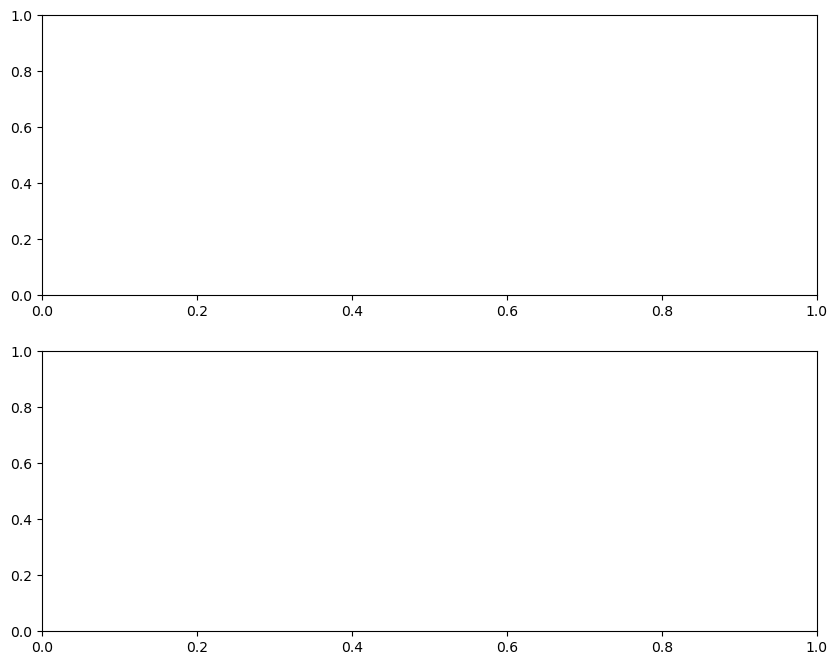

In [19]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop["M"].plot(kind="bar", rot=0, ax=axes[0], title="Male")
letter_prop["F"].plot(kind="bar", rot=0, ax=axes[1], title="Female",
                      legend=False)

Vẽ biểu đồ thanh để so sánh phân bố ký tự cuối cùng của tên bé trai và bé gái qua ba năm (1910, 1960, 2010). plt.subplots(2, 1) tạo hai biểu đồ con xếp chồng lên nhau để dễ dàng so sánh.

In [ ]:
plt.subplots_adjust(hspace=0.25)

In [ ]:
letter_prop = table / table.sum()

dny_ts = letter_prop.loc[["d", "n", "y"], "M"].T
dny_ts.head()

Tính toán lại tỷ lệ phần trăm (vì table chứa tất cả các năm) và sau đó trích xuất xu hướng của các ký tự cuối cùng 'd', 'n', 'y' cho tên bé trai ("M") qua tất cả các năm. .T chuyển vị (transpose) kết quả để năm trở thành chỉ mục.

In [ ]:
plt.close("all")

In [ ]:
fig = plt.figure()

In [ ]:
dny_ts.plot()

In [ ]:
all_names = pd.Series(top1000["name"].unique())
lesley_like = all_names[all_names.str.contains("Lesl")]
lesley_like

In [ ]:
filtered = top1000[top1000["name"].isin(lesley_like)]
filtered.groupby("name")["births"].sum()

In [ ]:
table = filtered.pivot_table("births", index="year",
                             columns="sex", aggfunc="sum")
table = table.div(table.sum(axis="columns"), axis="index")
table.tail()

In [ ]:
fig = plt.figure()

In [ ]:
table.plot(style={"M": "k-", "F": "k--"})

In [ ]:
import json
db = json.load(open("datasets/usda_food/database.json"))
len(db)

In [ ]:
db[0].keys()
db[0]["nutrients"][0]
nutrients = pd.DataFrame(db[0]["nutrients"])
nutrients.head(7)

In [ ]:
info_keys = ["description", "group", "id", "manufacturer"]
info = pd.DataFrame(db, columns=info_keys)
info.head()
info.info()

In ra tóm tắt thông tin về DataFrame info, kiểm tra kiểu dữ liệu và số lượng giá trị không bị thiếu.

In [ ]:
pd.value_counts(info["group"])[:10]

In [ ]:
nutrients = []

for rec in db:
    fnuts = pd.DataFrame(rec["nutrients"])
    fnuts["id"] = rec["id"]
    nutrients.append(fnuts)

nutrients = pd.concat(nutrients, ignore_index=True)

Gộp tất cả thông tin dinh dưỡng từ các mục thực phẩm thành một DataFrame lớn:
Vòng lặp: Duyệt qua mỗi mục thực phẩm.
Tạo DataFrame con: Chuyển đổi list "nutrients" thành DataFrame con (fnuts).
Gán ID: Thêm cột "id" (ID thực phẩm) vào fnuts để có thể gộp sau này.
Nối: pd.concat() nối tất cả các DataFrame con lại.

In [ ]:
nutrients

In [ ]:
nutrients.duplicated().sum()  # number of duplicates
nutrients = nutrients.drop_duplicates()

In [ ]:
col_mapping = {"description" : "food",
               "group"       : "fgroup"}
info = info.rename(columns=col_mapping, copy=False)
info.info()
col_mapping = {"description" : "nutrient",
               "group" : "nutgroup"}
nutrients = nutrients.rename(columns=col_mapping, copy=False)
nutrients

Đoạn này đổi tên các cột tương tự trong DataFrame nutrients ("description" thành "nutrient", "group" thành "nutgroup").



In [ ]:
ndata = pd.merge(nutrients, info, on="id")
ndata.info()
ndata.iloc[30000]

Kiểm tra bản ghi thứ 30000 của DataFrame ndata đã gộp, xác nhận thông tin chất dinh dưỡng và thực phẩm được kết hợp đúng.

In [ ]:
fig = plt.figure()

In [ ]:
result = ndata.groupby(["nutrient", "fgroup"])["value"].quantile(0.5)
result["Zinc, Zn"].sort_values().plot(kind="barh")

Phân tích lượng Kẽm (Zinc) trong các nhóm thực phẩm:
Nhóm và Quantile: Nhóm dữ liệu theo chất dinh dưỡng và nhóm thực phẩm, sau đó tính phân vị 0.5 (median/trung vị) của cột "value".
Lọc: Lọc kết quả cho chất dinh dưỡng "Zinc, Zn".
Vẽ biểu đồ: Vẽ biểu đồ thanh ngang, sắp xếp kết quả để xem nhóm thực phẩm nào có nồng độ Kẽm trung vị cao nhất.

In [ ]:
by_nutrient = ndata.groupby(["nutgroup", "nutrient"])

def get_maximum(x):
    return x.loc[x.value.idxmax()]

max_foods = by_nutrient.apply(get_maximum)[["value", "food"]]

# make the food a little smaller
max_foods["food"] = max_foods["food"].str[:50]

Tìm thực phẩm có lượng chất dinh dưỡng tối đa trong mỗi nhóm:
Hàm get_maximum: Tìm chỉ mục của giá trị tối đa (idxmax()) trong cột "value" của nhóm và trả về hàng tương ứng (.loc[...]).
Áp dụng: Áp dụng hàm này cho nhóm (nhóm chất dinh dưỡng, chất dinh dưỡng).
Lọc cột: Chỉ giữ lại các cột "value" và "food".
Làm sạch: Cắt ngắn tên thực phẩm dài.
Kiểm tra: In ra các tên thực phẩm có lượng Amino Acids tối đa.

In [ ]:
max_foods.loc["Amino Acids"]["food"]

In [ ]:
fec = pd.read_csv("datasets/fec/P00000001-ALL.csv", low_memory=False)
fec.info()

Tải dữ liệu đóng góp chiến dịch bầu cử Mỹ (FEC) từ tệp CSV. low_memory=False được sử dụng để xử lý các tệp lớn có nhiều kiểu cột hỗn hợp. Sau đó, .info() được dùng để kiểm tra cấu trúc dữ liệu.

In [ ]:
fec.iloc[123456]

Kiểm tra hàng thứ 123456 của DataFrame, giúp xác nhận dữ liệu đã được tải chính xác.

In [ ]:
unique_cands = fec["cand_nm"].unique()
unique_cands
unique_cands[2]

 trích xuất và in ra danh sách các ứng cử viên duy nhất có trong dữ liệu đóng góp.

In [ ]:
parties = {"Bachmann, Michelle": "Republican",
           "Cain, Herman": "Republican",
           "Gingrich, Newt": "Republican",
           "Huntsman, Jon": "Republican",
           "Johnson, Gary Earl": "Republican",
           "McCotter, Thaddeus G": "Republican",
           "Obama, Barack": "Democrat",
           "Paul, Ron": "Republican",
           "Pawlenty, Timothy": "Republican",
           "Perry, Rick": "Republican",
           "Roemer, Charles E. 'Buddy' III": "Republican",
           "Romney, Mitt": "Republican",
           "Santorum, Rick": "Republican"}

Tạo một dictionary ánh xạ tên ứng cử viên sang đảng phái tương ứng của họ (Dân chủ hoặc Cộng hòa).

In [ ]:
fec["cand_nm"][123456:123461]
fec["cand_nm"][123456:123461].map(parties)
# Add it as a column
fec["party"] = fec["cand_nm"].map(parties)
fec["party"].value_counts()

Thêm cột "party" (đảng phái) vào DataFrame fec bằng cách ánh xạ. Sau đó, .value_counts() được sử dụng để đếm tổng số lượng đóng góp theo từng đảng phái.

In [ ]:
(fec["contb_receipt_amt"] > 0).value_counts()

Đếm số lượng đóng góp có giá trị dương (True) và không dương (False) trong cột số tiền đóng góp.

In [ ]:
fec = fec[fec["contb_receipt_amt"] > 0]

In [ ]:
fec_mrbo = fec[fec["cand_nm"].isin(["Obama, Barack", "Romney, Mitt"])]

Thực hiện lọc dữ liệu:
Lọc đóng góp dương: Chỉ giữ lại các hàng có số tiền đóng góp lớn hơn 0.
Lọc ứng cử viên chính: Tạo DataFrame mới (fec_mrbo) chỉ chứa các đóng góp dành cho hai ứng cử viên chính là Obama và Romney.

In [ ]:
fec["contbr_occupation"].value_counts()[:10]

Đếm và in ra 10 nghề nghiệp của người đóng góp phổ biến nhất.

In [ ]:
occ_mapping = {
   "INFORMATION REQUESTED PER BEST EFFORTS" : "NOT PROVIDED",
   "INFORMATION REQUESTED" : "NOT PROVIDED",
   "INFORMATION REQUESTED (BEST EFFORTS)" : "NOT PROVIDED",
   "C.E.O.": "CEO"
}

def get_occ(x):
    # If no mapping provided, return x
    return occ_mapping.get(x, x)

fec["contbr_occupation"] = fec["contbr_occupation"].map(get_occ)

Thực hiện chuẩn hóa/làm sạch cột nghề nghiệp:
Ánh xạ: Tạo dictionary occ_mapping để hợp nhất các biến thể của "INFORMATION REQUESTED" thành "NOT PROVIDED" và chuẩn hóa "C.E.O." thành "CEO".
Hàm get_occ: Định nghĩa hàm sử dụng .get(x, x) để nếu không tìm thấy khóa trong mapping thì trả về giá trị gốc (x).
Áp dụng: Áp dụng hàm này lên cột "contbr_occupation".

In [ ]:
emp_mapping = {
   "INFORMATION REQUESTED PER BEST EFFORTS" : "NOT PROVIDED",
   "INFORMATION REQUESTED" : "NOT PROVIDED",
   "SELF" : "SELF-EMPLOYED",
   "SELF EMPLOYED" : "SELF-EMPLOYED",
}

def get_emp(x):
    # If no mapping provided, return x
    return emp_mapping.get(x, x)

fec["contbr_employer"] = fec["contbr_employer"].map(get_emp)

Thực hiện chuẩn hóa/làm sạch cột công ty tương tự như cột nghề nghiệp, hợp nhất các biến thể của "INFORMATION REQUESTED" và "SELF/SELF EMPLOYED".

In [ ]:
by_occupation = fec.pivot_table("contb_receipt_amt",
                                index="contbr_occupation",
                                columns="party", aggfunc="sum")
over_2mm = by_occupation[by_occupation.sum(axis="columns") > 2000000]
over_2mm

Tổng hợp số tiền đóng góp theo nghề nghiệp và đảng phái:
Pivot: Tạo bảng tổng hợp với nghề nghiệp làm chỉ mục, đảng phái làm cột và tổng số tiền đóng góp (sum) làm giá trị.
Lọc: Lọc bảng để chỉ giữ lại các nghề nghiệp có tổng số tiền đóng góp lớn hơn 2 triệu đô la (over_2mm).

In [ ]:
plt.figure()

In [ ]:
over_2mm.plot(kind="barh")

Vẽ biểu đồ thanh ngang để trực quan hóa tổng số tiền đóng góp của các nghề nghiệp lớn nhất, phân chia theo đảng phái (Màu xanh cho Dân chủ, Màu cam cho Cộng hòa).

In [ ]:
def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)["contb_receipt_amt"].sum()
    return totals.nlargest(n)

In [ ]:
grouped = fec_mrbo.groupby("cand_nm")
grouped.apply(get_top_amounts, "contbr_occupation", n=7)
grouped.apply(get_top_amounts, "contbr_employer", n=10)

Định nghĩa một hàm để tìm các nghề nghiệp/công ty đóng góp nhiều nhất cho từng ứng cử viên chính:
Hàm get_top_amounts: Nhóm dữ liệu đóng góp theo một khóa (nghề nghiệp/công ty) và tính tổng số tiền, sau đó lấy n giá trị lớn nhất.
Áp dụng: Áp dụng hàm này cho dữ liệu đã nhóm theo tên ứng cử viên (grouped), với khóa là "contbr_occupation", in ra 7 nghề nghiệp đóng góp hàng đầu cho Obama và Romney.



In [ ]:
bins = np.array([0, 1, 10, 100, 1000, 10000,
                 100_000, 1_000_000, 10_000_000])
labels = pd.cut(fec_mrbo["contb_receipt_amt"], bins)
labels

Thực hiện rời rạc hóa (binning) số tiền đóng góp vào các khoảng đã định nghĩa:
Tạo khoảng: Định nghĩa các mốc đóng góp (bins).
Cắt: Hàm pd.cut() phân loại số tiền đóng góp của Obama và Romney vào các khoảng này, tạo ra Series labels là kiểu Categorical.

In [ ]:
grouped = fec_mrbo.groupby(["cand_nm", labels])
grouped.size().unstack(level=0)

Đếm số lượng đóng góp trong mỗi khoảng tiền, phân chia theo ứng cử viên:
Nhóm: Nhóm theo cặp ứng cử viên và khoảng đóng góp.
Đếm và Tái cấu trúc: Dùng .size() để đếm và .unstack(level=0) để xoay tên ứng cử viên thành cột.

In [ ]:
plt.figure()

In [ ]:
bucket_sums = grouped["contb_receipt_amt"].sum().unstack(level=0)
normed_sums = bucket_sums.div(bucket_sums.sum(axis="columns"),
                              axis="index")
normed_sums
normed_sums[:-2].plot(kind="barh")

Tính tổng số tiền đóng góp trong mỗi khoảng tiền, sau đó chuẩn hóa nó để xem tỷ lệ phần trăm đóng góp của mỗi ứng cử viên trong từng khoảng tiền:
Tổng tiền: Tính tổng số tiền đóng góp (sum) cho mỗi nhóm.
Chuẩn hóa: .div(..., axis="index") chia tổng đóng góp của mỗi ứng cử viên trong một khoảng tiền cho tổng đóng góp chung của khoảng tiền đó, cho ra tỷ lệ phần trăm.

In [ ]:
grouped = fec_mrbo.groupby(["cand_nm", "contbr_st"])
totals = grouped["contb_receipt_amt"].sum().unstack(level=0).fillna(0)
totals = totals[totals.sum(axis="columns") > 100000]
totals.head(10)

Tổng hợp đóng góp theo tiểu bang:
Nhóm và Tổng hợp: Nhóm theo ứng cử viên và tiểu bang, tính tổng số tiền đóng góp.
Tái cấu trúc và Điền thiếu: Xoay tên ứng cử viên thành cột và điền NaN bằng 0.
Lọc: Chỉ giữ lại các tiểu bang có tổng đóng góp lớn hơn 100,000.

In [ ]:
percent = totals.div(totals.sum(axis="columns"), axis="index")
percent.head(10)

Tính tỷ lệ đóng góp của mỗi ứng cử viên trong mỗi tiểu bang (trong số các tiểu bang lớn):
Chia đóng góp của mỗi ứng cử viên cho tổng đóng góp của tiểu bang đó,
cho thấy ứng cử viên nào chiếm ưu thế ở tiểu bang nào.